matplotlib :: Box plots

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

# import data
df = pd.read_csv("/goinfre/hrami/python/python_for_data/data_jobs.csv")

# data cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [24]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

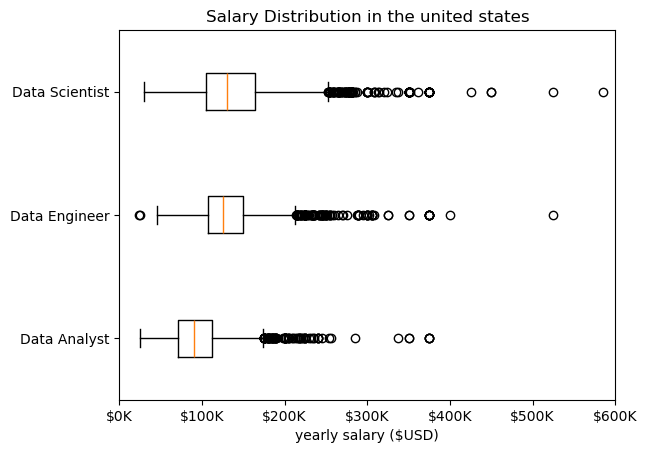

In [37]:
job_title = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_us = df[(df['job_title_short'].isin(job_title)) & (df['job_country'] == 'United States')].copy()
df_us = df_us.dropna(subset=['salary_year_avg'])
job_list = [df_us[df_us['job_title_short'] == job]['salary_year_avg']for job in job_title]
plt.boxplot(job_list, tick_labels=job_title, vert=False)
plt.title("Salary Distribution in the united states")
plt.xlabel("yearly salary ($USD)")
x = plt.gca()
x.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()